<h1><center><font size="25">Detección de Comunidades con Python en Grafos y Redes</font></center></h1>

<center><b>Fernando Carazo y Joaquín Amat</b></center>

<center><i>Marzo, 2023</i></center>

# Introducción
<br>

La detección de comunidades con grafos es una técnica utilizada para encontrar grupos de nodos altamente interconectados en una red. La detección de comunidades tiene aplicaciones en diversos campos, como la biología, la informática, las redes sociales, entre otros. En particular, se hará énfasis en el algoritmo de Louvain, un método eficiente y escalable para la detección de comunidades. 

Un problema muy común en teoría de grafos es el de identificar grupos de nodos con características similares dentro de un grafo. Este problema también se le conoce como detección de comunidades. La detección de comunidades es una técnica que se utiliza en diversas aplicaciones prácticas, tales como la identificación de grupos de personas con intereses similares, la clasificación de proteínas con funciones relacionadas y la agrupación de sitios web con temas comunes.

En el ámbito de las redes sociales, la detección de comunidades se utiliza para identificar grupos de personas con intereses similares, lo cual puede ser útil para campañas publicitarias personalizadas. Por ejemplo, si una empresa de ropa deportiva quiere dirigir su publicidad a personas interesadas en el fitness, puede utilizar la detección de comunidades para identificar grupos de personas con este interés y dirigir su publicidad a esas personas.

Si todavía no estás familiarizado con los grafos, puedes leer el primer artículo de [introducción a grafos y redes con Python](https://www.cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python.html).

<p align="center"><img src="../images/unesco.png" style="width: 700px"></p>

<center><font size='2.5'>
<i>Visualizaciones de un grafo basado en la web semántica. Fuente UNESCO: https://ich.unesco.org/es/explora[</i>
</font></center>




# Detección de comunidades
<br>
Antes de profundizar en el algoritmo de Louvain, es importante comprender qué es una comunidad en un grafo. En términos simples, una comunidad es un grupo de nodos que tienen una alta densidad de conexiones entre ellos, pero una baja densidad de conexiones con nodos fuera del grupo. Es decir, los nodos dentro de una comunidad están fuertemente conectados entre sí y se diferencian claramente de los nodos fuera de la comunidad.

La detección de comunidades en teoría de grafos se refiere a la tarea de encontrar esos clusters de nodos que están más conectados entre sí que con el resto del grafo. Existen multitud de algoritmos para detectar comunidades en un grafo, y el algoritmo adecuado depende del tipo de grafo y del problema en cuestión. 

Algunos de los algoritmos más comunes y relevantes son:

- **Algoritmo de Girvan-Newman**: este algoritmo se basa en la idea de eliminar gradualmente las aristas que conectan los grupos de nodos con mayor densidad, hasta que queden subgrafos desconectados que representan las comunidades.

- **Algoritmo de Infomap**: este algoritmo se basa en la idea de que los nodos de una comunidad tienen una probabilidad más alta de ser visitados por un recorrido aleatorio que los nodos del resto del grafo.

- **Algoritmo de Louvain**: este algoritmo es uno de los más populares y se basa en la idea de optimización modularidad, que busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades. El concepto de la modularidad se explicará en detalle más adelante.

El algoritmo de Louvain es uno de los algoritmos más populares y eficientes para detectar comunidades en un grafo. Es una buena opción en situaciones en las que se desea encontrar comunidades en un grafo de manera rápida y eficiente. También es una buena opción cuando se desea encontrar comunidades que sean compactas y bien definidas. Además, el algoritmo de Louvain es fácil de implementar y puede manejar grafos grandes y complejos con eficiencia.

# Algritmo de Louvain
<br>

## Modularidad

El algoritmo de Louvain tiene como objetivo optimizar un concepto matemático denominado modularidad. La modularidad es una medida que se utiliza en la teoría de grafos para evaluar la calidad de una partición de un grafo en comunidades. Esta medida busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades.

La modularidad se define como la diferencia entre el número de enlaces dentro de las comunidades y el número de enlaces esperados por azar. Una alta modularidad indica que las comunidades encontradas tienen más conexiones que las esperadas por azar y,  por tanto, las comunidades son compactas y bien definidas. 

La modularidad tiene un rango de valores entre -0,5 y 1 y se define mediante la siguiente fórmula:

$$
M=\frac{1}{2 m} \sum_{i j}\left[A_{i j}-\frac{k_i k_j}{2 m}\right] \delta\left(c_i, c_j\right)
$$
dónde
- $A_{i j}$ matriz de adyacencia (nodos $i$ y $j$). Puede ser de un grafo ponderado.;
- $k_i$ y $k_j$ son la suma de los pesos de la matriz de adyacencia de los ejes que conectan a los nodos $i$ y $j$ (si el grafo es no ponderado, equivale al grado del nodo, es decir, el número de conexiones);
- $m$ es la suma de todos los pesos de la matriz de adyacencia (en un grafo no ponderado, es igual al número de ejes: $L$);
- $c_i$ y $c_j$ son las comunidades a las que pertenecen los nodos $i$ y $j$; y
- $\delta$ es la función delta de Kronecker ( $\delta(c_i, c_j)=1$ si los nodos $i$ y $j$ pertenecen a la misma comunidad, $0$ en caso contrario), de tal forma que la fórmula sólo aplica si los nodos pertenecen a la misma comunidad.

Para un grafo no ponderado, la modularidad se puede simplificar a la siguiente fórmula:
$$
M=\frac{1}{2 L} \sum_{i j}\left[A_{i j}-\frac{k_i k_j}{2 L}\right] \delta\left(c_i, c_j\right)
$$

dónde
- $L$ es el número total de enlaces del grafo;



Una forma sencilla de entender la ecuación es la siguiente:


1. Para encontrar las comunidades de mayor calidad, se quiere maximizar la modularidad. 

2. La fórmula únicamente toma valores distintos de cero cuando los nodos pertenecen a la misma comunidad, pues si no el delta de Kroneker vale 0.

3. Maximizar la ecuación implica que el primer término de la ecuación debe ser lo más alto posible, mientras que el segundo término debe ser lo más bajo posible. 

4. $\sum_{i j}A_{i j}$ es el número de enlaces existentes dentro de una comunidad.

5. El segundo término de la ecuación representa el número de enlaces esperados por azar entre dos nodos. Para ello, se utiliza el grado de cada nodo. Si el grado de alguno de los nodos es 0, el número de enlaces esperados por azar será 0 (ya que uno de los nodos no tiene enlaces). El número de enlaces posibles es proporcional al producto de los grados de los nodos. Por tanto, el número de enlaces esperados por azar es proporcional al producto de los grados de los nodos y se divide por el número total de enlaces ($2 L$).

6. Por tanto, si el número de enlaces de la comunidad es mayor que el esperado por azar en esa comunidad, tendremos una modularidad positiva. Cuanto mayor sea la diferencia entre el número de enlaces dentro de la comunidad y el número de enlaces esperados por azar, mayor será la modularidad.

En la siguiente imagen se muestran varios ejemplos de modularidad con distintas particiones. Se puede observar que la mejor partición es la de modularidad más alta.

<p align="center"><img src="../images/06_modularity-graph-database-1.png" style="width: 500px"></p>

<center><font size='2.5'>
<i>Modularidad para varios tipos de agrupaciones.[</i>
</font></center>

# Algoritmo
<br>

El algoritmo de [Louvain](https://perso.uclouvain.be/vincent.blondel/research/louvain.html) es uno de los algoritmos más populares y eficientes para detectar comunidades en un grafo. Se basa en la idea de optimización modularidad, que busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades.

El algoritmo de Louvain se divide en dos fases: una fase de agrupamiento y una fase de refinamiento. 

**Fase de agrupamiento**

En la fase de agrupamiento, se comienza agrupando todos los nodos del grafo en una sola comunidad. Luego, se itera sobre cada nodo del grafo y se calcula la ganancia en modularidad que se obtendría al mover el nodo a una comunidad diferente. 

Si se obtiene una ganancia positiva, se mueve el nodo a la comunidad correspondiente. Esto se repite hasta que ya no se pueden obtener ganancias adicionales.

**Fase de refinamiento**

La fase de refinamiento se aplica después de la fase de agrupamiento. Su objetivo es mejorar aún más la partición del grafo en comunidades encontrada en la fase de agrupamiento. 

Esta fase se divide cada comunidad en subcomunidades, y se vuelve a calcular la modularidad de la partición resultante. Si se obtiene una ganancia positiva en modularidad, se mantiene la partición. Si no se obtiene una ganancia, se vuelve a la partición anterior. 

Esta etapa se repite hasta que ya no se pueden obtener ganancias adicionales en modularidad. 

Al final de esta fase, se obtiene una partición final del grafo en comunidades que es más compacta y bien definida que la obtenida en la fase de agrupamiento.

El algoritmo de Louvain fue propuesto por primera vez en un artículo titulado "Fast unfolding of communities in large networks" ("Despliegue rápido de comunidades en grandes redes"), publicado en la revista "Journal of Statistical Mechanics: Theory and Experiment" en 2008.


<p align="center"><img src="../images/07_louvain.png" style="width: 500px"></p>

<center><font size='2.5'>
<i>Modularidad para varios tipos de agrupaciones.[</i>
</font></center>

# Parametro del algoritmo de Louvain: Resolución

El algoritmo de Louvain tiene un parámetro llamado `resolution` (resolución) que controla el grado de resolución de las comunidades detectadas. Un valor de resolución alto produce comunidades más pequeñas y específicas, mientras que un valor bajo produce comunidades más grandes y generales. Este es un parámetro importante que debe ser ajustado para cada caso.

El la siguiente figura del artículo "Laplacian Dynamics and Multiscale Modular Structure in Networks" se muestra la influencia del parámetro resolution en la calidad de las particiones (R(t)). En la imagen, el parámetro "time" representa "resolution". Se puede ver que cuanto mayor es la resolución, más pequeñas son las comunidades encontradas.

<p align="center"><img src="../images/pygml02-resolution.png" style="width: 500px"></p>

<br>

<center><font size='2.5'>
<i>Influencia del parámetro resolution (time) en la calidad de las particiones (R(t)). Source "Laplacian Dynamics and Multiscale Modular Structure in Networks" R. Lambiotte, J.-C. Delvenne, M. Barahona</i>
</font></center>

Es importante tener en cuenta que el valor de resolución óptimo depende de cada caso y del tamaño de las comunidades que se desean detectar. Por lo tanto, se recomienda experimentar con diferentes valores de resolution para encontrar la configuración que mejor se adapte a los objetivos de la detección de comunidades en un grafo determinado.

# Detección de comunidades con Python
<br>

El algoritmo de Louvain se puede utilizar con Python utilizando el paquete de código abierto "Community". Este paquete se puede instalar utilizando el administrador de paquetes de Python, pip, de la siguiente manera:


`pip install python-louvain`

En primer lugar, se crea un grafo a modo de ejemplo. Para ello, se utilizará el generador de grafos barbell de NetworkX, que genera un grafo con dos grupos de nodos conectados por una serie de nodos que actuan como enlace.

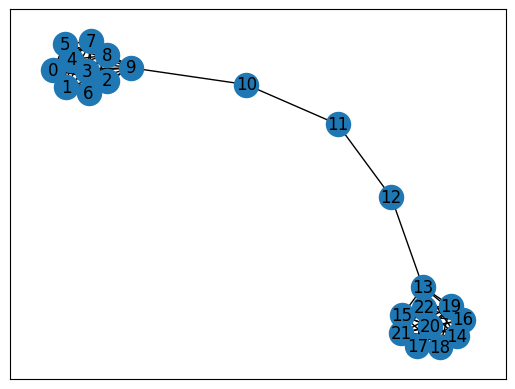

In [1]:
import networkx as nx

# Cargamos un grafo de ejemplo lollypop
G = nx.barbell_graph(m1=10, m2=3)
nx.draw_networkx(G,)

## Algoritmo de Louvain

Una vez que se ha instalado el paquete, se puede importar el módulo community_louvain. Puede encontrar más documentación asociada con la función a la que nos referiremos aquí [4].

Esto debería devolver las comunidades asociadas detectadas desde G en forma de diccionario. Las claves del diccionario son los nodos y los valores corresponden a la comunidad a la que pertenece ese nodo.



En Python, el algoritmo de Louvain se puede implementar utilizando la biblioteca `python-louvain`. La función principal para la detección de comunidades es `community_louvain.best_partition()`, que toma como argumento un grafo de red y devuelve un diccionario que asigna cada nodo a su respectiva comunidad.

El argumento del grafo puede ser una matriz de adyacencia o un objeto `NetworkX` que representa el grafo. Por ejemplo, para cargar un grafo desde un archivo y aplicar el algoritmo de Louvain, se pueden utilizar los siguientes comandos:

El diccionario `partition` tiene como claves los nodos del grafo y como valores las comunidades asignadas. 

La función `best_partition()` tiene algunos parámetros opcionales que permiten personalizar el algoritmo:

- El parámetro `weight` permite especificar un atributo de peso en las conexiones del grafo.
- El parámetro `randomize` permite especificar si se debe aleatorizar el orden de los nodos en cada iteración.
- El parámetro `random_state` permite especificar una semilla para la aleatorización.
- El parámetro `resolution` permite ajustar el grado de resolución de las comunidades.

In [2]:
# pip install python-louvain
from community import community_louvain


# calculamos las comunidades usando el algoritmo de Louvain
partition = community_louvain.best_partition(
    G,
    resolution=1.,
    random_state=999)

partition.items()

dict_items([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2)])

In [3]:
# Determinar el númer y tamaño de las comunidades
from collections import Counter
Counter(partition.values())

Counter({0: 10, 1: 3, 2: 10})

## Visualización de comunidades
<br>

Filmente podemos visualizar las comunidades encontradas en el grafo. Para ello, utilizaremos el paquete NetworkX, que nos permite crear y visualizar grafos. Para más información sobre dibujado de grafos, puedes consultar el [anterior artículo de la serie](https://www.cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python.html).

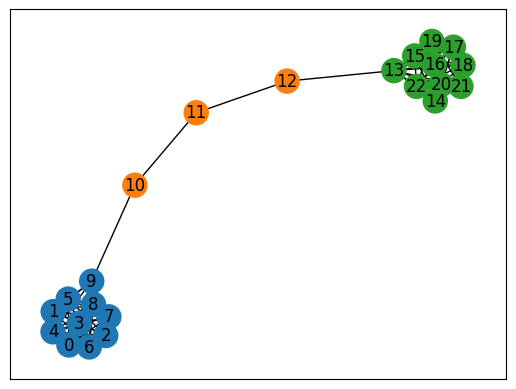

In [4]:
import matplotlib.colors as mcolors

# Color de los nodos
cmap = dict(list(enumerate(mcolors.TABLEAU_COLORS.values())))
node_cmap = [cmap[v] for v in partition.values()]

nx.draw_networkx(G, node_color= node_cmap)



# Caso de estudio: círculos sociales de Facebook (Stanford)
<br>

La base de datos "Social circles: Facebook" fue creada por investigadores de la universidad de Stanford en el año 2012. Este conjunto de datos consta de redes de amistad de Facebook. Los datos disponibles incluyen características de nodos (perfiles) y sus conexiones de amistad. Los datos fueron anonimizados reemplazando los nombres y otras identificaciones por un índice numérico. Pueden descargarse de la web de Stanford (https://snap.stanford.edu/data/ego-Facebook.html).

In [5]:
# Librerías
# ==============================================================================
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import networkx as nx
warnings.filterwarnings("ignore")

## Lectura de los datos

In [6]:
# Lectura de datos
# ==============================================================================
facebook = pd.read_csv(
    "../data/facebook_combined.txt",
    header=None,
    sep=" ",
    names=["user_1", "user_2"],
)

Los datos consisten en una lista de ejes entre usuarios, cada fila es una relacción de amistad. Para reducir los requerimientos computacionales, en este ejemplo se emplean únicamente las 2000 primeras conexiones.

In [7]:
facebook = facebook[:5000]
facebook.head()

,user_1,user_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Al ser relaciones de amistad y no tener direccionalidad, se representan mediante un grafo no direccional.

In [8]:
# Creación de grafo
# ==============================================================================
G_facebook = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2", create_using=nx.Graph())

## Información del grafo


Se muestra la información sobre la estructura del grafo.

In [9]:
print("Número de nodos:", G_facebook.number_of_nodes())
print("Número de enlaces:", G_facebook.number_of_edges())

Número de nodos: 1724
Número de enlaces: 5000


## Visualización de la red

Al visualizar la red se observa que hay tres comunidades de usuarios: 

- Dos grandes conjuntos de usuarios altamente conectados.

- Un grupo de unos pocos nodos centrales, algunos de los cuales conectan los otros dos grandes grupos.

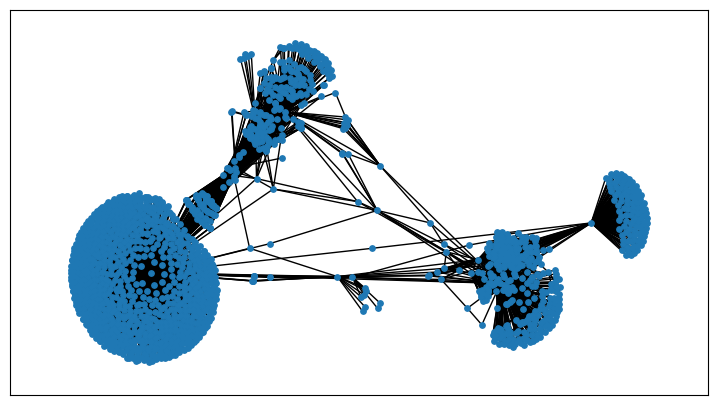

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(G_facebook)
nx.draw_networkx(
    G_facebook, pos=spring_pos, with_labels=False, node_size=15, ax=ax
)


## Detección de comunidades - Algoritmo de Louvain

In [11]:
from community import community_louvain

# calculamos con el 
partition = community_louvain.best_partition(
    G_facebook,
    resolution=1.)


## Dibujado de la red

Para visualizar las comunidades detectadas, se puede utilizar la función `draw_networkx()` de `NetworkX`. Esta función permite especificar un diccionario de colores para colorear los nodos en función de su comunidad.

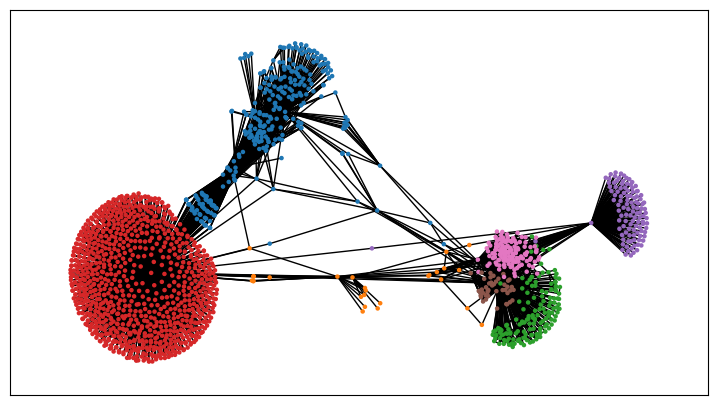

In [12]:
import matplotlib.colors as mcolors

# Color de los nodos
cmap = dict(list(enumerate(mcolors.TABLEAU_COLORS.values())))
node_cmap = [cmap[v] for v in partition.values()]

fig, ax = plt.subplots(figsize=(9, 5))
nx.draw_networkx(
    G_facebook, pos=spring_pos, with_labels=False, node_size=5, ax=ax, node_color= node_cmap
)

Cabe destacar que para el dibujado de los grafos existen librerías mucho más potentes que las que hemos utilizado en este notebook. Por ejemplo, la librería `netwulf` permite dibujar grafos de una forma mucho más eficiente y con un mayor control sobre el aspecto de los nodos y las aristas, así como de la posición de los nodos en el espacio.

Para aprender a visualizar redes con un alto número de nodos `netwulf`, puedes consultar el siguiente artículo en el que generamos la siguiente visualización de la red de amistad de Facebook con los más de 80.000 nodos.

<p align="center"><img src="../images/facebook-communities.png" style="width: 500px"></p>

<center><font size='2.5'>
<i>Visualización de la red de amistad de Facebook con los más de 80.000 nodos.</i>
</font></center>

## Conclusiones

En este notebook hemos visto cómo detectar comunidades en redes sociales utilizando el algoritmo de Louvain. Este algoritmo es una de las técnicas más populares para la detección de comunidades en redes sociales. Sin embargo, existen otras técnicas que pueden ser útiles en algunos casos. Por ejemplo, el algoritmo de Girvan-Newman, que permite detectar comunidades en redes dirigidas.

# References

1. V. D. Blondel, J.-L. Guillaume, R. Lambiotte and E. Lefebvre, "Fast unfolding of communities in large networks," J. Stat. Mech. (2008) P10008, p. 12, 2008.
2. [NetworkX](https://networkx.github.io)
3. [Python-louvain](https://python-louvain.readthedocs.io)
4. "Laplacian Dynamics and Multiscale Modular Structure in Networks", R. Lambiotte, J.-C. Delvenne, M. Barahona

# Información de sesión

In [13]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
community   NA
matplotlib  3.5.2
networkx    2.8.4
pandas      1.5.3
sinfo       0.3.4
-----
IPython             8.7.0
jupyter_client      7.4.8
jupyter_core        5.1.1
notebook            6.5.2
-----
Python 3.10.9 (main, Jan 11 2023, 09:18:20) [Clang 14.0.6 ]
macOS-10.16-x86_64-i386-64bit
8 logical CPU cores, i386
-----
Session information updated at 2023-03-14 10:18


**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Graph Machine Learning: Grafos by Fernando Carazo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>